<a href="https://colab.research.google.com/github/SSM11011/Predicting-User-Churn-for-an-E-commerce-Platform/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [ ]:
df = pd.read_csv("/content/events.csv")
resumetable(df)

Dataset Shape: (885129, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,event_time,object,0,845041,2020-09-24 11:57:06 UTC,2020-09-24 11:57:26 UTC
1,event_type,object,0,3,view,view
2,product_id,int64,0,53453,1996170,139905
3,category_id,int64,0,718,2144415922528452715,2144415926932472027
4,category_code,object,236219,107,electronics.telephone,computers.components.cooler
5,brand,object,212364,999,NaN,zalman
6,price,float64,0,12422,31.9,17.16
7,user_id,int64,0,407283,1515915625519388267,1515915625519380411
8,user_session,object,165,490398,LJuJVLEjPT,tdicluNnRY


In [ ]:
df["event_time_col"] = pd.to_datetime(df["event_time"])

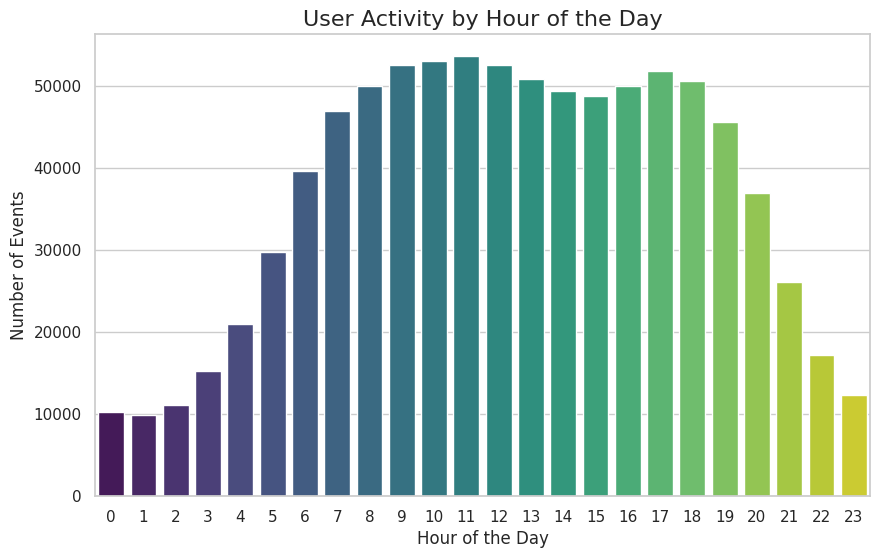

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['event_time_col'].dt.hour, palette='viridis')
plt.title('User Activity by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.show()

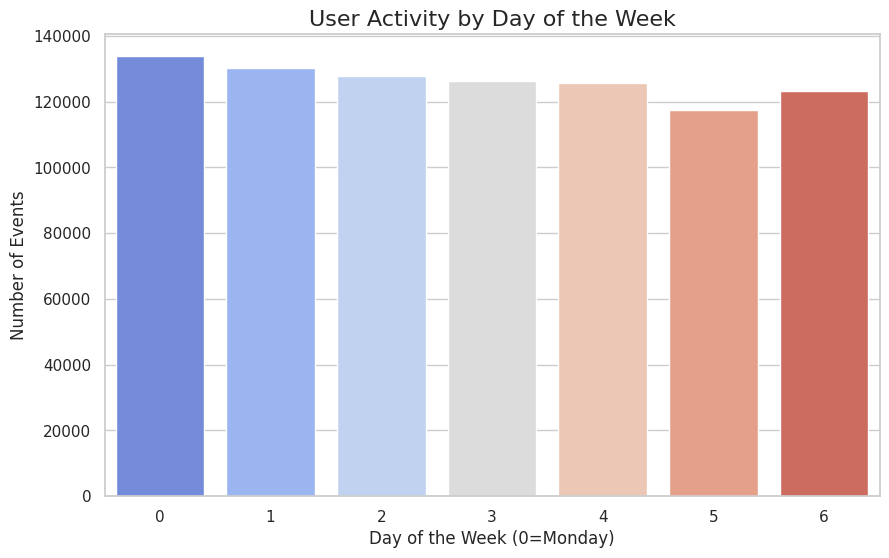

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['event_time_col'].dt.dayofweek, palette='coolwarm')
plt.title('User Activity by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0=Monday)', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.show()

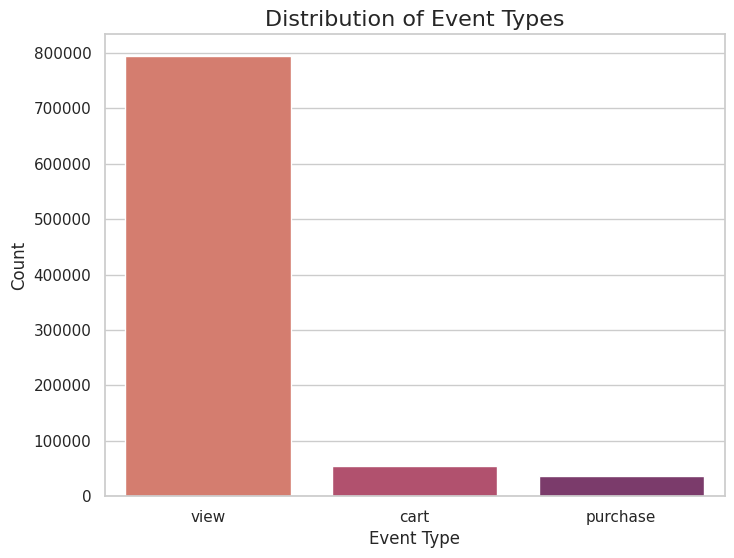

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='event_type', hue='event_type', palette='flare')
plt.title('Distribution of Event Types', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

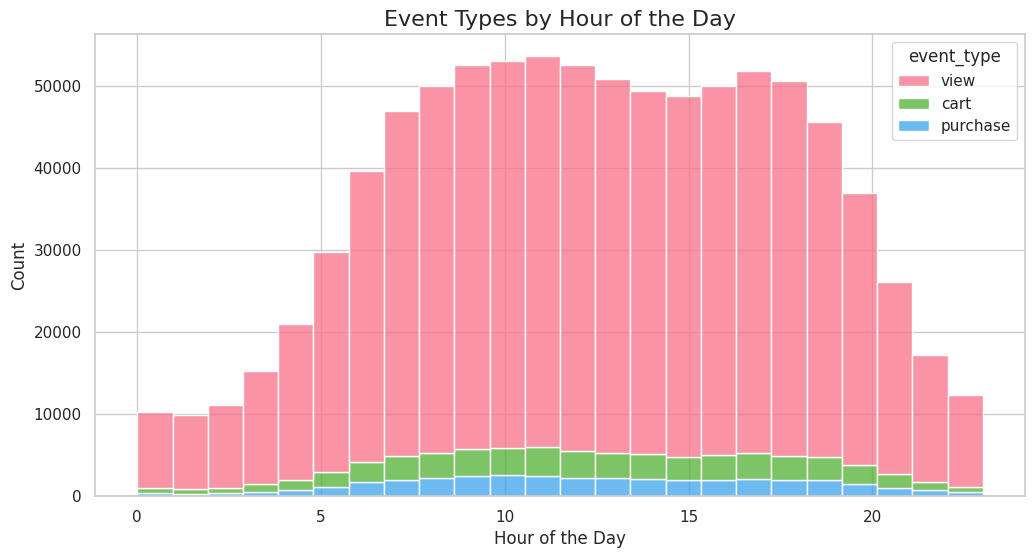

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['event_time_col'].dt.hour, hue='event_type', multiple='stack', palette='husl', bins=24)
plt.title('Event Types by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

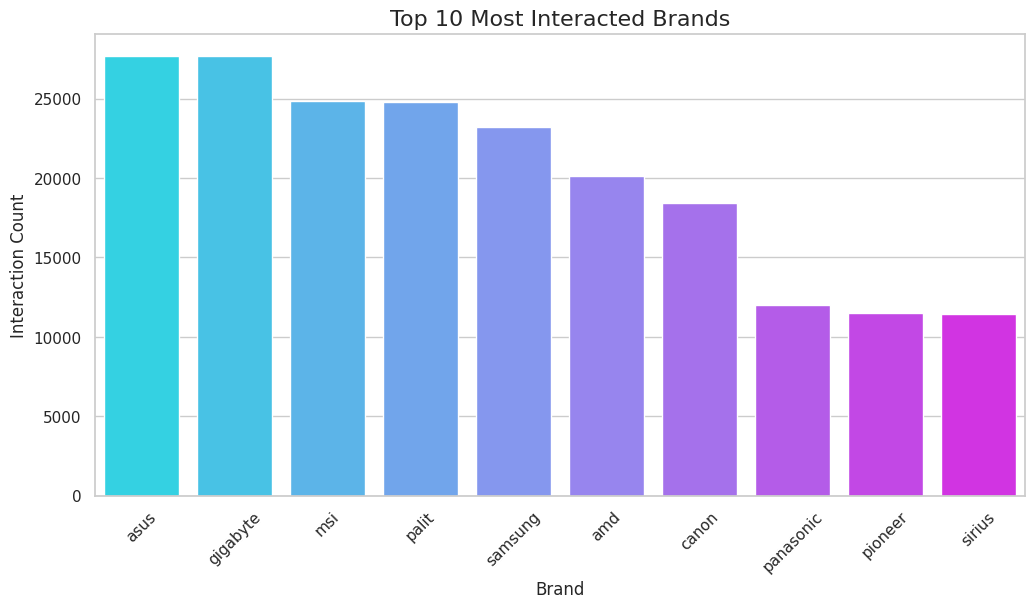

In [ ]:
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='cool')
plt.title('Top 10 Most Interacted Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Interaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

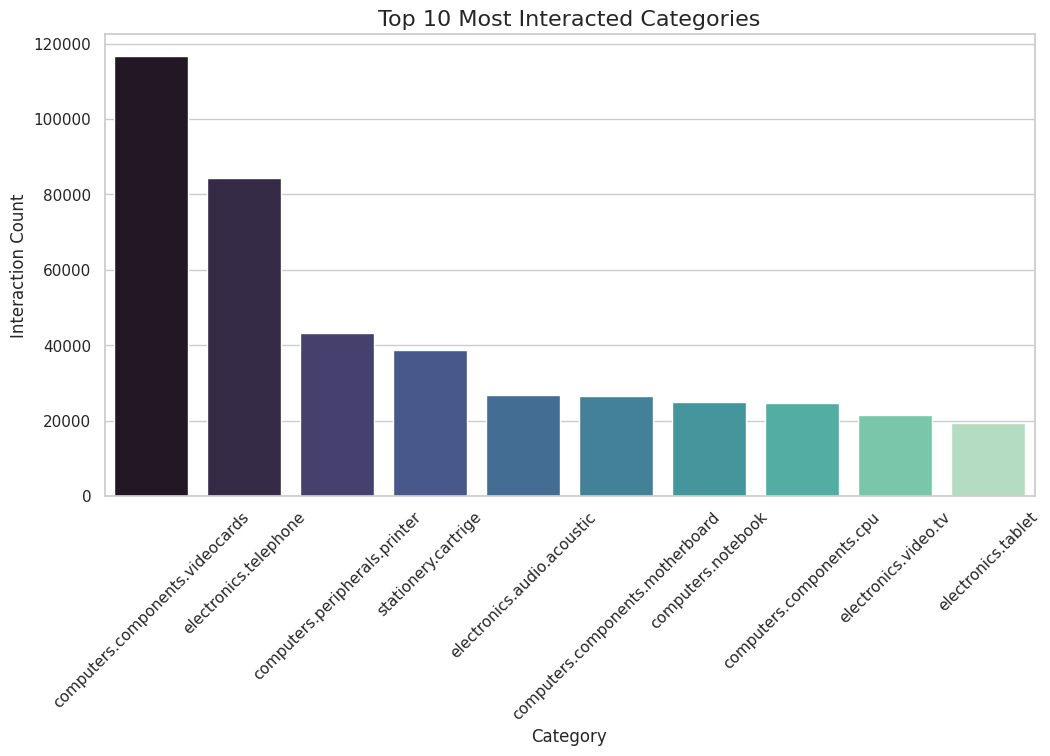

In [ ]:
top_categories = df['category_code'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='mako')
plt.title('Top 10 Most Interacted Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Interaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
purchase_df = df[df['event_type'] == "purchase"]
user_purchase_sums = purchase_df.groupby('user_id')['price'].sum().reset_index()
user_purchase_sums['price'] = user_purchase_sums['price'].round(2)
user_purchase_sums = user_purchase_sums.sort_values(by='price', ascending=False)